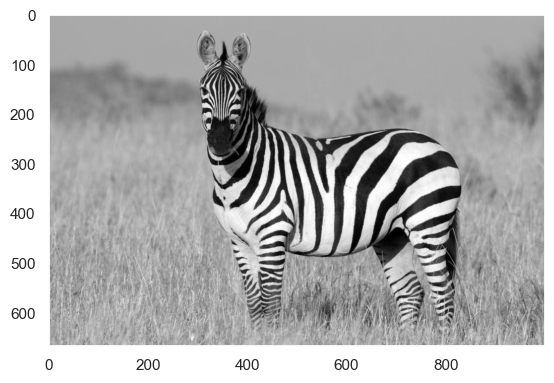

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

from skimage.feature import graycomatrix, graycoprops
from skimage import data
from skimage import io
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte


image = data.camera()
image = io.imread("data/img1.jpg")
image = rgb2gray(image)
image = img_as_ubyte(image)
plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')

In [93]:
import numpy as np

PATCH_SIZE = 71

# select some patches from grassy areas of the image
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_locations =np.array([
    [48,   286],
    [227,   286],
    [53,   471],
    [247,   453],
])
grass_locations = grass_locations[:, ::-1]

grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = np.array([
    [133,   39],
    [516,   88],
    [785,   53],
    [773,   119],
])
# change from y,x to x,y
sky_locations = sky_locations[:, ::-1]

sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(graycoprops(glcm, 'energy')[0, 0])
    ys.append(graycoprops(glcm, 'dissimilarity')[0, 0])


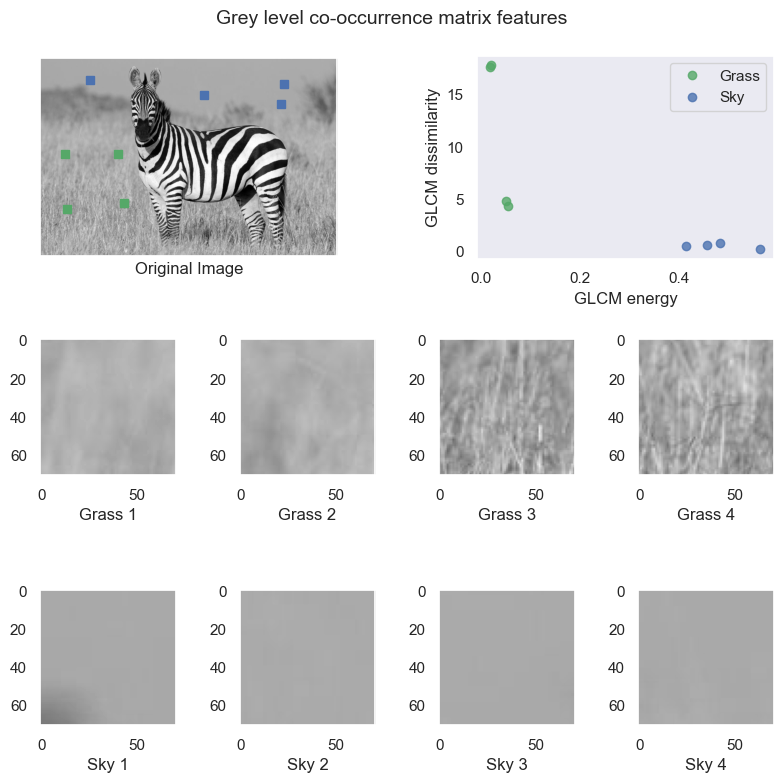

In [103]:

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass', alpha=0.8)
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky', alpha=0.8)
ax.set_xlabel('GLCM energy')
ax.set_ylabel('GLCM dissimilarity')

ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=0.99)
plt.tight_layout()
plt.show()

[0 0 1 1 0 0 0 0]


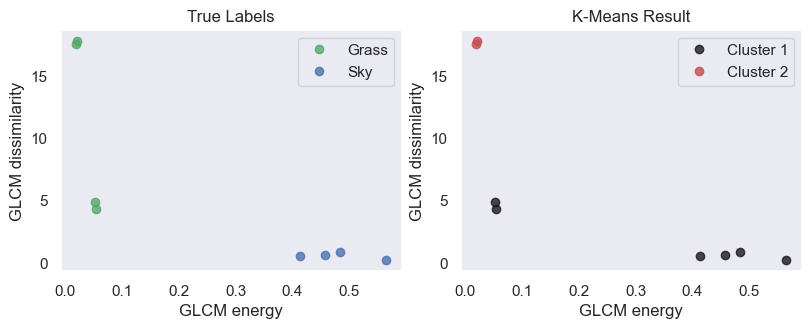

In [104]:
#cluster points using kmeans
from sklearn.cluster import KMeans
import numpy as np
X = np.array([xs, ys]).T
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)

# plot the clustered points 
fig = plt.figure(figsize=(8, 8), constrained_layout=True)

ax = fig.add_subplot(3, 2, 1)
ax.set_title("True Labels")
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass', alpha=0.8)
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky', alpha=0.8)
ax.set_xlabel('GLCM energy')
ax.set_ylabel('GLCM dissimilarity')
ax.legend()

ax = fig.add_subplot(3, 2, 2)
ax.set_title('K-Means Result')
ax.plot(X[kmeans.labels_==0, 0], X[kmeans.labels_==0, 1], 'ko',
        label='Cluster 1', alpha=0.8)
ax.plot(X[kmeans.labels_==1, 0], X[kmeans.labels_==1, 1], 'ro',
        label='Cluster 2', alpha=0.8)    
ax.set_xlabel('GLCM energy')
ax.set_ylabel('GLCM dissimilarity')
ax.legend()

plt.show()


In [96]:
# importing the module
import cv2

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

# driver function
if __name__=="__main__":

	# reading the image
	img = cv2.imread('data/img1.jpg', 1)

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()
